# CEFET-RJ - UNED Nova Iguaçu  <IMG STYLE="position:absolute; TOP:25px; LEFT:500px; WIDTH:63px; HEIGHT:48px" SRC="logocefet.jpg">

## Dep. Engenharia de Controle e Automação

### Disciplina: Processamento Digital de Imagens

Exercise 3.6

Loading modules

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Loading images

In [9]:
origImg = cv2.imread('pcbCropped.png', 1)
origImg = cv2.normalize(origImg.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
defectImg = cv2.imread('pcbCroppedTranslatedDefected.png', 1)
defectImg = cv2.normalize(defectImg.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)


Shifting images

In [10]:
row, col, chan1 = origImg.shape
xShift = 10
yShift = 10
#registImg = np.zeros((defectImg.shape[0], defectImg.shape[1]))
registImg = np.zeros(defectImg.shape)
registImg[yShift + 1: row, xShift + 1: col] = defectImg[1: row - yShift, 1: col - xShift]


Comparing images and showing differences

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


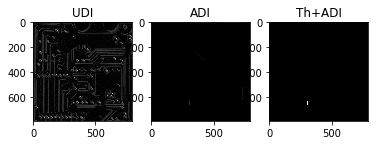

In [11]:
diffImg1 = abs(origImg - defectImg)
plt.subplot(1, 3, 1)
plt.imshow(diffImg1)
plt.title('UDI')
cv2.imwrite('udi.png', diffImg1*255)

diffImg2 = abs(origImg - registImg)
plt.subplot(1, 3, 2)
plt.imshow(diffImg2)
plt.title('ADI')
cv2.imwrite('adi.png', diffImg2*255)

print(type(diffImg2))
bwImg = diffImg2 > 0.15
print(type(bwImg))

height, width, chan2 = bwImg.shape
border = round(0.05*width)
borderMask = np.zeros(bwImg.shape)
borderMask[border:height-border, border:width-border] = 1
bwImg = bwImg * borderMask
plt.subplot(1, 3, 3)
plt.imshow(bwImg)
plt.title('Th+ADI')
cv2.imwrite('bwimg.png', bwImg*255)

plt.show()
